In [30]:
######################## PRIMARY DEPENDENCIES ########################
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import nltk  # NLP toolkit
from nltk.corpus import stopwords as nltk_stopwords  # Stopwords
from sklearn.naive_bayes import MultinomialNB as MNBClassifier  # Classifier
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF_Transformer  # Text vectorization
from sklearn.metrics import classification_report as eval_report, accuracy_score as acc_scorer  # Metrics
from sklearn.model_selection import train_test_split as dataset_splitter  # Data splitting

######################## VISUALIZATION/UTILS ########################
import os  # System operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Enhanced visuals
from sklearn.preprocessing import LabelEncoder as TargetEncoder  # Label encoding

######################## DEEP LEARNING SETUP ########################
import torch  # PyTorch core
from torch import nn as neural_net  # Neural network modules
from torch.utils.data import DataLoader as BatchLoader, Dataset as CustomDataset  # Data handling
# from transformers import RobertaTokenizer as ROBERTA_Tokenizer, RobertaModel as ROBERTA_Backbone
from transformers import BertTokenizer as BERT_Tokenizer, BertModel as BERT_Backbone  # BERT components

In [31]:
# Verify file existence
print(f"Train: {os.path.isfile(t:='train.csv')}")
print(f"Test: {os.path.isfile(t:='test.csv')}")

Train: True
Test: True


In [32]:
# Load the CSV file into a DataFrame
trn,tst=pd.read_csv('train.csv',encoding='ISO-8859-1'),pd.read_csv('test.csv',encoding='ISO-8859-1')

In [33]:
trn.head(3)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18


In [34]:
tst.head(4)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (KmÂ²),Density (P/KmÂ²)
0,47f11efc72,this creepy guy when I was walking the dog I...,NaN,neutral,noon,60-70,CÃ´te d'Ivoire,26378274.0,318000.0,83.0
1,5affab3088,stomach cramps; sat in bed with a hot water bo...,cramps;,negative,noon,60-70,Angola,32866272.0,1246700.0,26.0
2,b5cbb35228,wants new hair now! Just so frank won`t talk t...,NaN,neutral,morning,46-60,Indonesia,273523615.0,1811570.0,151.0
3,e57c69be7a,Looking forward to android 1.5 being pushed t...,Looking forward to android 1.5 being pushed to...,neutral,morning,0-20,Eritrea,3546421.0,101000.0,35.0


In [35]:
def h_nulls(d, cols=None):
    """Handle nulls in DataFrame.
    <5%: drop all nulls. >=5%: keep rows where cols are not null."""
    p = d.isnull().mean().mean() * 100
    print(f"Missing: {p:.3f}%")

    if p < 5:
        print("<5% - dropping null rows")
        r = d.dropna()
        print(f"Rows removed: {len(d)-len(r)}")
    else:
        print(">=5% - filtering by cols")
        r = d if cols is None else d.dropna(subset=cols)
        print(f"Rows removed: {len(d)-len(r)}")

    return r

In [36]:
trn=h_nulls(trn)

Missing: 0.001%
<5% - dropping null rows
Rows removed: 1


In [37]:
tst = h_nulls(tst,['text','sentiment'])

Missing: 1.140%
<5% - dropping null rows
Rows removed: 3535


In [38]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
sw = stopwords.words('english')
sw=list(set(sw)-{'not','no','nor',"don't","isn't","aren't","couldn't","didn't","doesn't","hadn't","hasn't","haven't","mightn't","mustn't","needn't","shouldn't","wasn't","weren't","won't","wouldn't",'but','however','although','though'})
sw

['to',
 "we'll",
 'both',
 'on',
 'weren',
 'mightn',
 'your',
 'herself',
 'hadn',
 "we've",
 'into',
 "we'd",
 'him',
 'the',
 "i'll",
 'where',
 'mustn',
 'out',
 'or',
 'themselves',
 're',
 "she'll",
 "he'd",
 "i'd",
 'been',
 'isn',
 've',
 'most',
 'while',
 'yourselves',
 'it',
 'during',
 'i',
 "you're",
 'from',
 'whom',
 'have',
 'in',
 'as',
 'when',
 'that',
 'too',
 'before',
 'its',
 'why',
 'we',
 'myself',
 'd',
 "he'll",
 'if',
 "she'd",
 "they'd",
 'needn',
 'through',
 'few',
 'which',
 "you'll",
 'any',
 "should've",
 "it'd",
 'll',
 'here',
 'and',
 'against',
 "that'll",
 'between',
 'up',
 's',
 'my',
 'yours',
 'a',
 'should',
 'aren',
 "i'm",
 "he's",
 'only',
 "we're",
 'own',
 'yourself',
 'such',
 'an',
 'how',
 'those',
 'ma',
 'very',
 'do',
 "they're",
 'won',
 'some',
 'ourselves',
 'because',
 'more',
 'what',
 'there',
 "it'll",
 'until',
 'once',
 'she',
 "they've",
 'does',
 'who',
 'over',
 'under',
 'this',
 'other',
 'he',
 "you've",
 'wasn',
 'o

In [40]:
import re

In [41]:
# First define the preprocessing function with its full name
def pp(t):
    t = t.lower()
    t = ' '.join(w for w in t.split() if w not in sw)
    t = re.sub(r'https?://\S+', ' ', t)
    t = re.sub(r'[^a-z0-9\s!?*$]', '', t)
    return re.sub(r'\s+', ' ', t).strip()

# 4. Apply to your existing 'trn',tst DataFrame
trn['txt'] = trn['text'].apply(pp)
tst['txt'] = tst['text'].apply(pp)
# 5. Show results (first 3 rows, original vs processed)
trn[['text', 'txt']].head(3)

,text,txt
0,"I`d have responded, if I were going",id responded going
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad miss san diego!!!
2,my boss is bullying me...,boss bullying me


In [42]:
tst[['text', 'txt']].head(4)

,text,txt
1,stomach cramps; sat in bed with a hot water bo...,stomach cramps sat bed hot water bottle hot mi...
3,Looking forward to android 1.5 being pushed t...,looking forward android 15 pushed g1 then?
4,is up and ready,ready
5,yea it is. thanks for the link.,yea is thanks link


In [43]:
# Sentiment mapping to numeric classes
s_map = {"positive":2, "neutral":1, "negative":0}
rev_map = {2:"positive", 1:"neutral", 0:"negative"}

# Apply mapping to train/test data
trn["sent"] = trn["sentiment"].map(s_map)
tst["sent"] = tst["sentiment"].map(s_map)

In [44]:
neg = trn['sentiment']=='negative'
pos = trn['sentiment']=='positive'
neu = trn['sentiment']=='neutral'

In [45]:
trn['len'] = trn['txt'].apply(lambda x: len(x.split()))

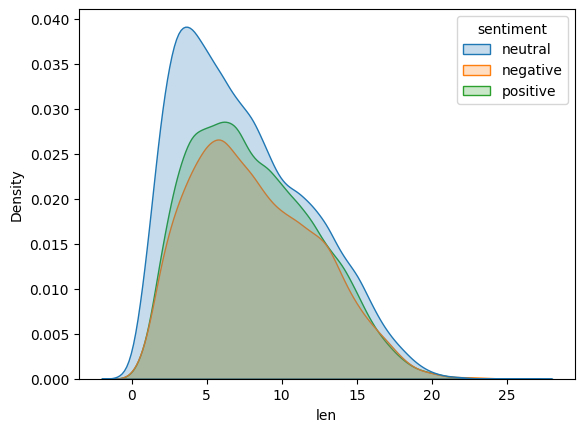

In [46]:
sns.kdeplot(data=trn, x='len', hue='sentiment', fill=1, common_norm=1)
plt.show()

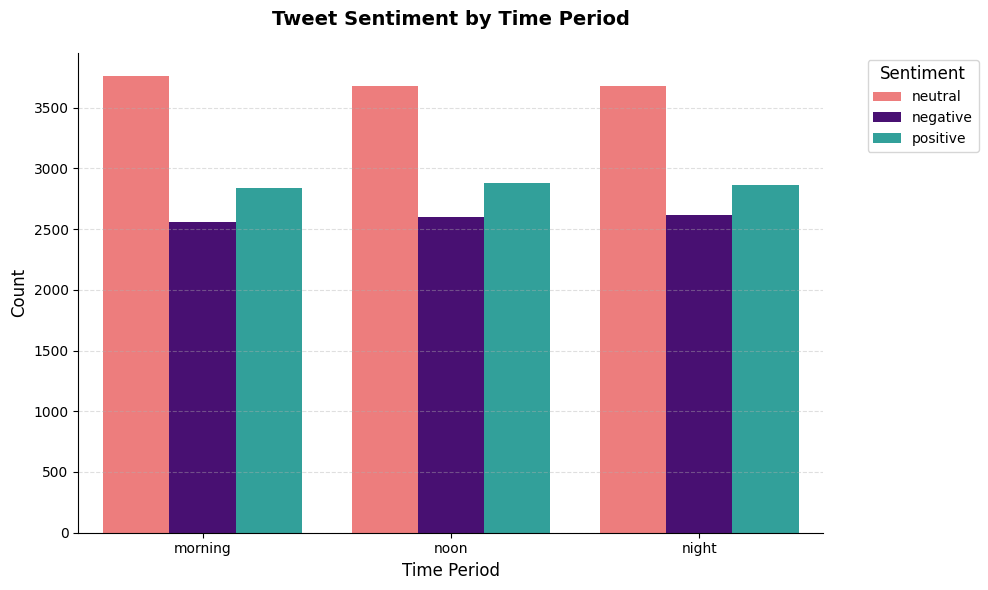

In [98]:
# Sentiment distribution plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Time of Tweet',
                  data=trn,
                  hue='sentiment',
                  palette=['#FF6B6B', '#4B0082', '#20B2AA'])

plt.title('Tweet Sentiment by Time Period',
          fontsize=14,
          pad=20,
          fontweight='bold')
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Sentiment',
           title_fontsize=12,
           bbox_to_anchor=(1.05, 1),
           loc='upper left')

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


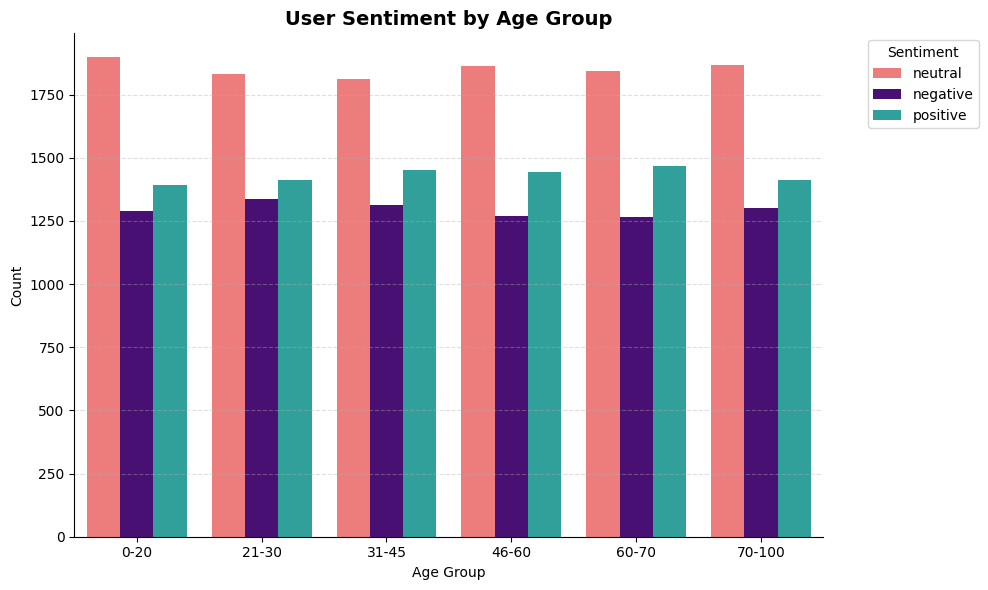

In [48]:
# Age vs Sentiment plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Age of User',
                 data=trn,
                 hue='sentiment',
                 palette=['#FF6B6B', '#4B0082', '#20B2AA'])
plt.title('User Sentiment by Age Group',
         fontsize=14,
         fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Sentiment',
          bbox_to_anchor=(1.05, 1),
          loc='upper left')

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

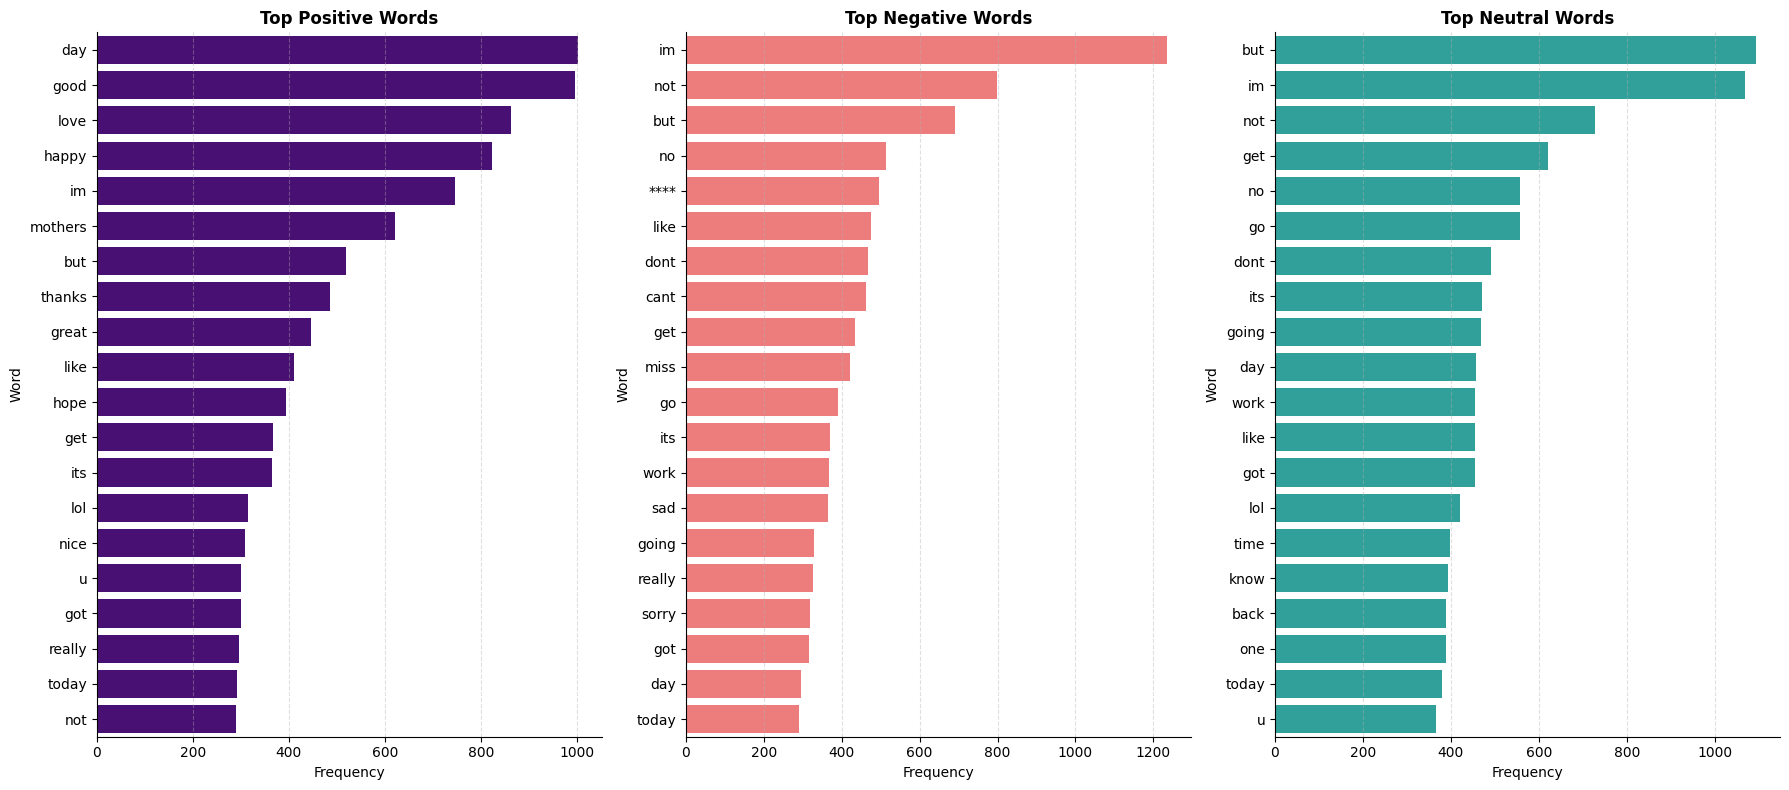

In [110]:
from collections import Counter
pos = trn[trn['sentiment'] == 'positive']['txt']
neg = trn[trn['sentiment'] == 'negative']['txt']
neu = trn[trn['sentiment'] == 'neutral']['txt']

# Create frequency DataFrames
top_p = pd.DataFrame(Counter(" ".join(pos).split()).most_common(20), columns=['Word', 'Freq'])
top_n = pd.DataFrame(Counter(" ".join(neg).split()).most_common(20), columns=['Word', 'Freq'])
top_u = pd.DataFrame(Counter(" ".join(neu).split()).most_common(20), columns=['Word', 'Freq'])

# Visualization
fig, ax = plt.subplots(1, 3, figsize=(18, 8))
sns.barplot(y='Word', x='Freq', data=top_p, ax=ax[0], color='#4B0082')
sns.barplot(y='Word', x='Freq', data=top_n, ax=ax[1], color='#FF6B6B')
sns.barplot(y='Word', x='Freq', data=top_u, ax=ax[2], color='#20B2AA')

for i, title in enumerate(['Positive', 'Negative', 'Neutral']):
    ax[i].set_title(f"Top {title} Words", fontweight='bold')
    ax[i].set_xlabel('Frequency')
    ax[i].grid(axis='x', linestyle='--', alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()

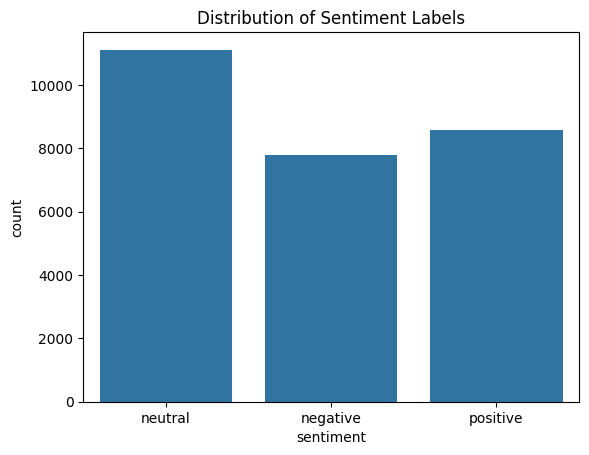

In [50]:
# Distribution of sentiment labels
sns.countplot(x='sentiment', data=trn)
plt.title("Distribution of Sentiment Labels")
plt.show()

In [51]:
# DATA PREPARATION CODE
# 1. First create the sentiment_class column
s_map = {"positive":2, "neutral":1, "negative":0}
trn['sentiment_class'] = trn['sentiment'].map(s_map)
tst['sentiment_class'] = tst['sentiment'].map(s_map)
X = trn['txt'].tolist()
y = trn['sentiment_class'].tolist()

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1770
)

# 4. Prepare test data
X_test = tst['txt'].tolist()
y_test = tst['sentiment_class'].tolist()


Applying TF_IDF vectorization on classical ML models

In [52]:
#Applying TF_IDF vectorization on classical ML models

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score

In [53]:
# Initialize TF-IDF
tfidf = TFIDF_Transformer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=5,
    max_df=0.95
)

X_train_vec = tfidf.fit_transform(trn['txt'])
X_test_vec = tfidf.transform(tst['txt'])

# MODEL DEFINITION

models = {
    'Logistic Regression': LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000,
        class_weight='balanced'
    ),
    'Naive Bayes': MNBClassifier(alpha=0.1),
    'SVM': LinearSVC(
        multi_class='ovr',
        max_iter=1000,
        class_weight='balanced'
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        max_depth=10
    )
}
# MODEL TRAINING & EVALUATION

results = {}
for name, model in models.items():
    model.fit(X_train_vec, trn['sentiment_class'])
    y_pred = model.predict(X_test_vec)
    results[name] = {
        'accuracy': acc_scorer(tst['sentiment_class'], y_pred),
        'report': eval_report(tst['sentiment_class'], y_pred)
    }

for name, res in results.items():
    print(f"\n{name} Performance:")
    print(f"Accuracy: {res['accuracy']:.4f}")
    print("Classification Report:")
    print(res['report'])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Performance:
Accuracy: 0.7865
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      7781
           1       0.77      0.75      0.76     11117
           2       0.83      0.82      0.82      8582

    accuracy                           0.79     27480
   macro avg       0.79      0.79      0.79     27480
weighted avg       0.79      0.79      0.79     27480


Naive Bayes Performance:
Accuracy: 0.7420
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72      7781
           1       0.66      0.84      0.74     11117
           2       0.84      0.70      0.76      8582

    accuracy                           0.74     27480
   macro avg       0.77      0.73      0.74     27480
weighted avg       0.76      0.74      0.74     27480


SVM Performance:
Accuracy: 0.8099
Classification Report:
              precision    recall  f1-sc

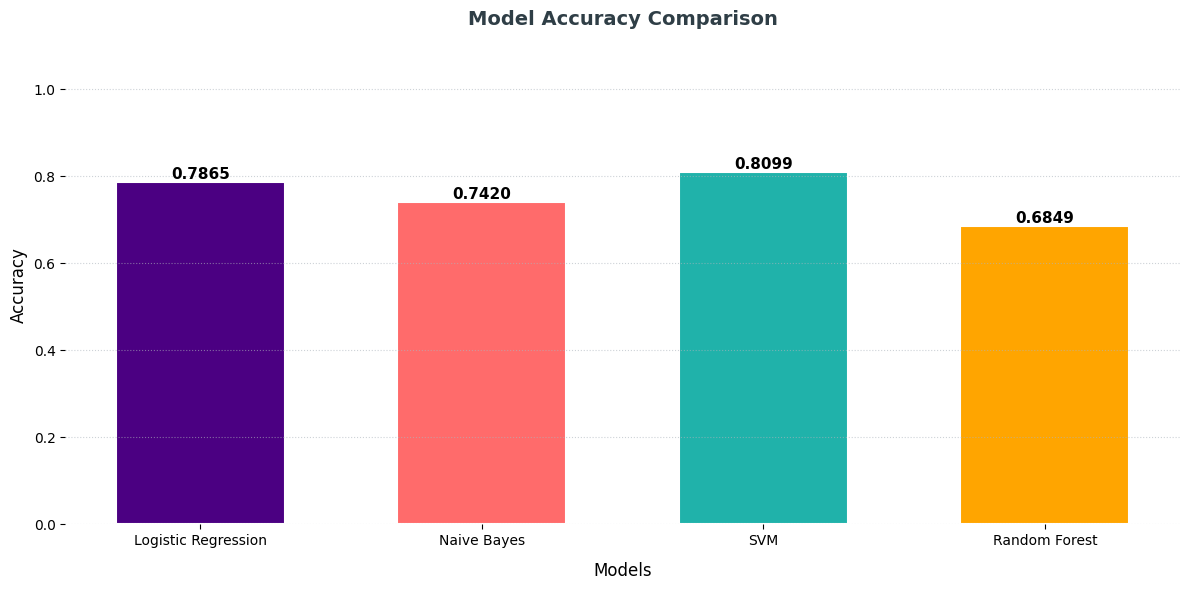

In [54]:
plt.figure(figsize=(12, 6))
colors = ['#4B0082', '#FF6B6B', '#20B2AA', '#FFA500']
bars = plt.bar(
    list(results.keys()),
    [res['accuracy'] for res in results.values()],
    color=colors,
    width=0.6,
    edgecolor='white',
    linewidth=1.5
)

plt.title('Model Accuracy Comparison',
         fontsize=14, pad=15, fontweight='bold', color='#2F3E46')
plt.xlabel('Models', fontsize=12, labelpad=10)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.1)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom',
             fontsize=11, fontweight='bold')

# Custom grid and spines
plt.grid(axis='y', linestyle=':', alpha=0.6, color='#ADB5BD')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


Loading the dataset into pytorch Dataset with embeddings

In [56]:
from torch.utils.data import Dataset
from tqdm import tqdm
import torch

########################
# EMBEDDING DATASET CLASS
########################

class TextDatasetWithEmbeddings(Dataset):
    def __init__(self, txts, lbls, tok, max_len, mdl, dev):
        self.txts = txts
        self.lbls = torch.tensor(lbls, dtype=torch.long)
        self.tok = tok
        self.max_len = max_len
        self.mdl = mdl
        self.dev = dev

        # Tokenize all texts
        self.enc = self.tok(
            txts,
            truncation=True,
            padding="max_length",
            max_length=max_len,
            return_tensors="pt"
        )

        # Precompute embeddings
        self.embs = self._precompute_embs()

    def _precompute_embs(self, bs=512):
        """Batch-process embeddings"""
        print("Generating embeddings...")
        self.mdl.eval().to(self.dev)
        all_embs = []

        for i in tqdm(range(0, len(self.txts), bs)):
            end_idx = min(i + bs, len(self.txts))

            batch = {
                'input_ids': self.enc['input_ids'][i:end_idx].to(self.dev),
                'attention_mask': self.enc['attention_mask'][i:end_idx].to(self.dev)
            }

            with torch.no_grad():
                out = self.mdl(**batch)
                all_embs.append(out.last_hidden_state.mean(1).cpu())

        return torch.cat(all_embs, dim=0)

    def __len__(self):
        return len(self.txts)

    def __getitem__(self, idx):
        return self.embs[idx], self.lbls[idx]

########################
# TOKENIZED DATASET CLASS
########################

class TokenizedDataset(Dataset):
    def __init__(self, txts, lbls, tok, max_len):
        self.enc = tok(
            txts,
            padding=True,
            truncation=True,
            max_length=max_len,
            return_tensors="pt"
        )
        self.lbls = torch.tensor(lbls, dtype=torch.long)

    def __len__(self):
        return len(self.lbls)

    def __getitem__(self, idx):
        return {k: v[idx] for k,v in self.enc.items()}, self.lbls[idx]

initializations of datasets/dataloaders

In [60]:
from transformers import BertTokenizer as BERT_Tokenizer, BertModel as BERT_Backbone

MAX_LEN = 128
MODEL_NAME = "bert-base-uncased"
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tok = BERT_Tokenizer.from_pretrained(MODEL_NAME)
bert_mdl = BERT_Backbone.from_pretrained(MODEL_NAME).to(dev)

Tokenized Dataset

In [111]:
train_dataset_tokenized = TokenizedDataset(X_train, y_train, tokenizer, MAX_LENGTH)
val_dataset_tokenized = TokenizedDataset(X_val, y_val, tokenizer, MAX_LENGTH)
test_dataset_tokenized = TokenizedDataset(X_test, y_test, tokenizer, MAX_LENGTH)

Embedded Dataset

In [75]:
train_ds_emb = TextDatasetWithEmbeddings(
    txts=X_train,
    lbls=y_train,
    tok=tok,
    max_len=MAX_LEN,
    mdl=bert_mdl,
    dev=dev
)

val_ds_emb = TextDatasetWithEmbeddings(
    txts=X_val,
    lbls=y_val,
    tok=tok,
    max_len=MAX_LEN,
    mdl=bert_mdl,
    dev=dev
)

test_ds_emb = TextDatasetWithEmbeddings(
    txts=X_test,
    lbls=y_test,
    tok=tok,
    max_len=MAX_LEN,
    mdl=bert_mdl,
    dev=dev
)



Generating embeddings...


100%|██████████| 43/43 [02:36<00:00,  3.63s/it]


Generating embeddings...


100%|██████████| 11/11 [00:39<00:00,  3.63s/it]


Generating embeddings...


100%|██████████| 54/54 [03:19<00:00,  3.70s/it]


In [112]:
bs_tr = 64     # Training batch size
bs_te = 256

Tokenized Dataloader

In [79]:
# Tokenized Datasets
tr_ds_tok = TokenizedDataset(X_train, y_train, tok, MAX_LEN)
val_ds_tok = TokenizedDataset(X_val, y_val, tok, MAX_LEN)
te_ds_tok = TokenizedDataset(X_test, y_test, tok, MAX_LEN)

# Data Loaders
tr_loader_tok = BatchLoader(tr_ds_tok, batch_size=bs_tr, shuffle=True)
val_loader_tok = BatchLoader(val_ds_tok, batch_size=bs_te, shuffle=True)
te_loader_tok = BatchLoader(te_ds_tok, batch_size=bs_te, shuffle=False)


In [113]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

def test_dl_model(model, model_name, test_dataset=test_ds_emb):
    # Make predictions
    test_label_pred = model.predict(test_dataset.embs.numpy())

    # Compute confusion matrix
    cm_test = confusion_matrix(test_dataset.lbls.numpy(), test_label_pred)

    # Set up the plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm_test, annot=True, fmt="d", cbar=True,
                xticklabels=list(rev_map.values()),
                yticklabels=list(rev_map.values()), ax=ax)
    ax.set_title("Test Confusion Matrix")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    for i in range(cm_test.shape[0]):
        ax.add_patch(patches.Rectangle((i, i), 1, 1, fill=False, edgecolor="Coral", linewidth=2))

    # Show the plot
    plt.tight_layout()
    plt.show()

    test_report = classification_report(test_dataset.lbls.numpy(), test_label_pred, output_dict=True)

    # Print classification report
    print("Test Classification Report:")
    print(f"Overall Score: {(model.score(test_dataset.embs.numpy(), test_dataset.lbls.numpy()) * 100):.2f}%")
    print(classification_report(test_dataset.lbls.numpy(), test_label_pred))
    metrics = {
        "model_name": model_name,
        "test_accuracy": test_report["accuracy"],
        "test_precision": test_report["weighted avg"]["precision"],
        "test_recall": test_report["weighted avg"]["recall"],
        "test_f1-score": test_report["weighted avg"]["f1-score"]
    }

    return metrics


In [83]:
results = []

In [89]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier with a random seed
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the embedded dataset
tree_classifier.fit(train_ds_emb.embs.numpy(), train_ds_emb.lbls.numpy())



DecisionTreeClassifier(random_state=42)

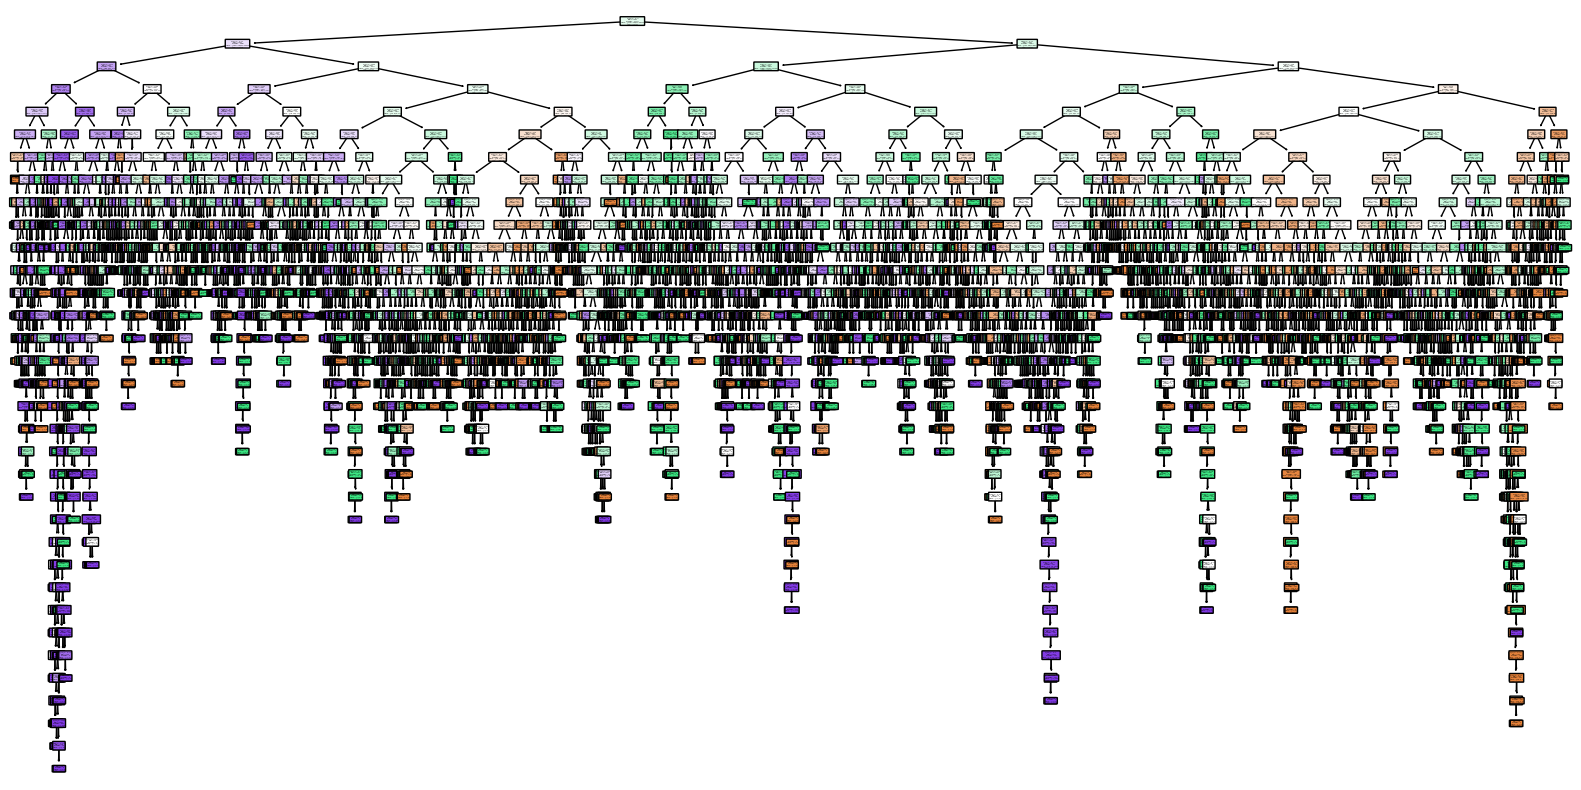

In [91]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plot_tree(tree_classifier, filled=True, feature_names=None, class_names=['negative', 'neutral', 'positive'], rounded=True)

plt.show()


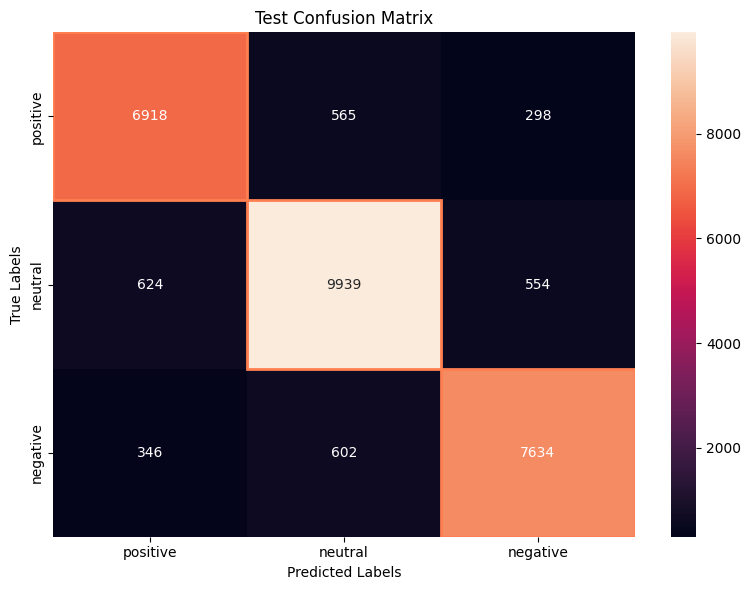

Test Classification Report:
Overall Score: 89.12%
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7781
           1       0.89      0.89      0.89     11117
           2       0.90      0.89      0.89      8582

    accuracy                           0.89     27480
   macro avg       0.89      0.89      0.89     27480
weighted avg       0.89      0.89      0.89     27480



In [94]:
results.append(test_dl_model(tree_classifier, "Decision Tree"))


In [96]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, verbose=True)

# Train the model on the embedded dataset
rf_model.fit(train_ds_emb.embs.numpy(), train_ds_emb.lbls.numpy())

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   38.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s


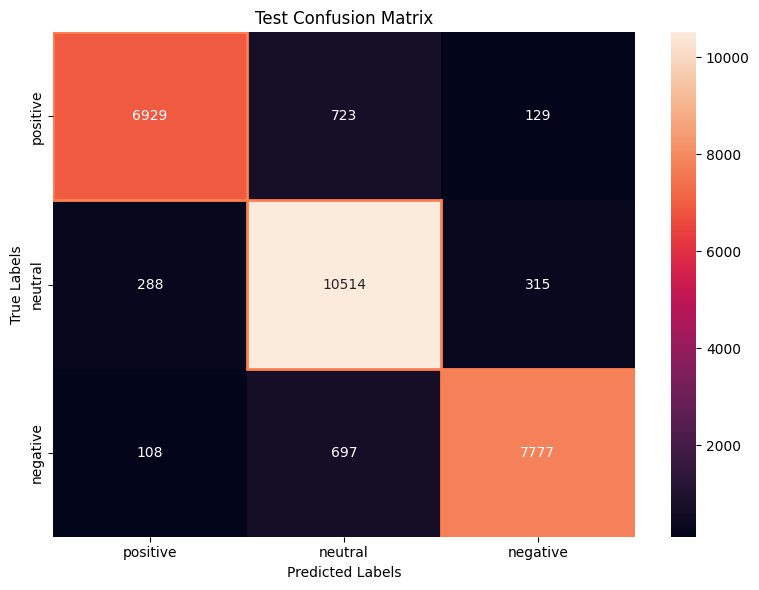

Test Classification Report:


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s


Overall Score: 91.78%
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7781
           1       0.88      0.95      0.91     11117
           2       0.95      0.91      0.93      8582

    accuracy                           0.92     27480
   macro avg       0.92      0.91      0.92     27480
weighted avg       0.92      0.92      0.92     27480



In [99]:
results.append(test_dl_model(rf_model,"Random Forest"))

In [100]:
from sklearn.linear_model import LogisticRegression
# Initialize the classifier with max iterations
lr_classifier = LogisticRegression(max_iter=1000)
# Train the model on the embedded dataset
lr_classifier.fit(train_ds_emb.embs.numpy(), train_ds_emb.lbls.numpy())


LogisticRegression(max_iter=1000)

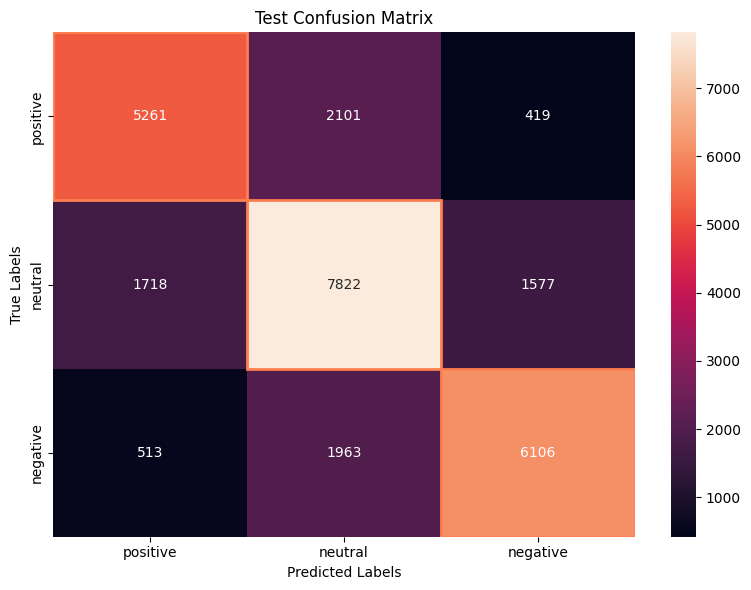

Test Classification Report:
Overall Score: 69.83%
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      7781
           1       0.66      0.70      0.68     11117
           2       0.75      0.71      0.73      8582

    accuracy                           0.70     27480
   macro avg       0.70      0.70      0.70     27480
weighted avg       0.70      0.70      0.70     27480



In [103]:
results.append(test_dl_model(lr_classifier,"Logistic Regression"))

In [104]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifier with number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=30)

# Train the model on the embedded dataset
knn_classifier.fit(train_ds_emb.embs.numpy(), train_ds_emb.lbls.numpy())


KNeighborsClassifier(n_neighbors=30)

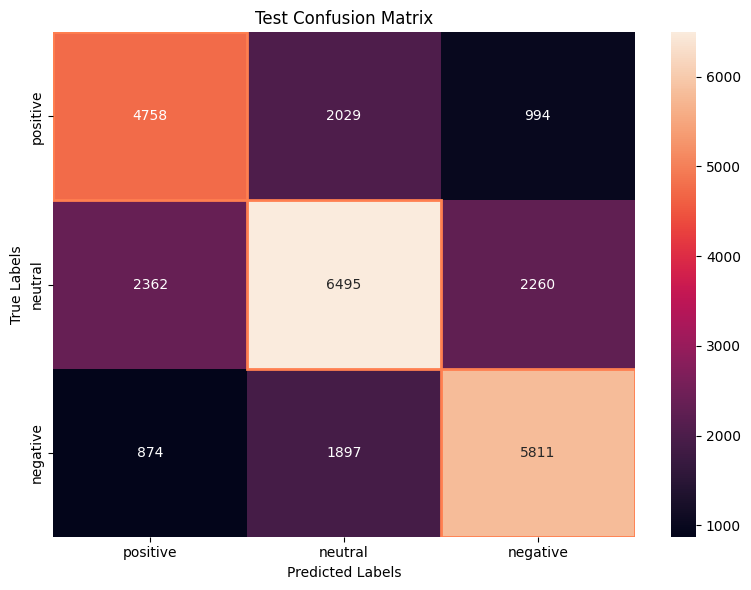

Test Classification Report:
Overall Score: 62.10%
              precision    recall  f1-score   support

           0       0.60      0.61      0.60      7781
           1       0.62      0.58      0.60     11117
           2       0.64      0.68      0.66      8582

    accuracy                           0.62     27480
   macro avg       0.62      0.62      0.62     27480
weighted avg       0.62      0.62      0.62     27480



In [106]:
results.append(test_dl_model(knn_classifier,"KNeighbors(k=30)"))

In [107]:
from sklearn.naive_bayes import GaussianNB

# Initialize the classifier with smoothing parameter
gnb_classifier = GaussianNB(var_smoothing=1e-2)

# Train the model on the embedded dataset
gnb_classifier.fit(train_ds_emb.embs.numpy(), train_ds_emb.lbls.numpy())


GaussianNB(var_smoothing=0.01)

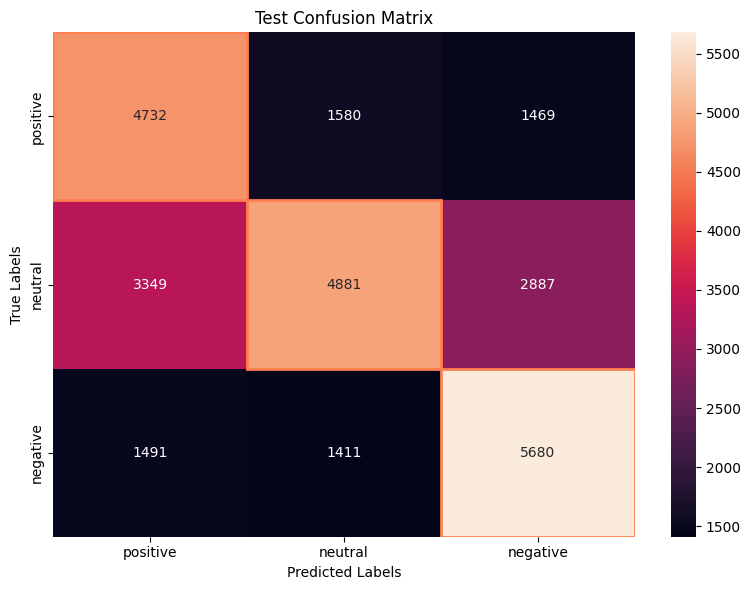

Test Classification Report:
Overall Score: 55.65%
              precision    recall  f1-score   support

           0       0.49      0.61      0.55      7781
           1       0.62      0.44      0.51     11117
           2       0.57      0.66      0.61      8582

    accuracy                           0.56     27480
   macro avg       0.56      0.57      0.56     27480
weighted avg       0.57      0.56      0.55     27480



In [108]:
results.append(test_dl_model(gnb_classifier, "Gaussian Naive Bayes"))

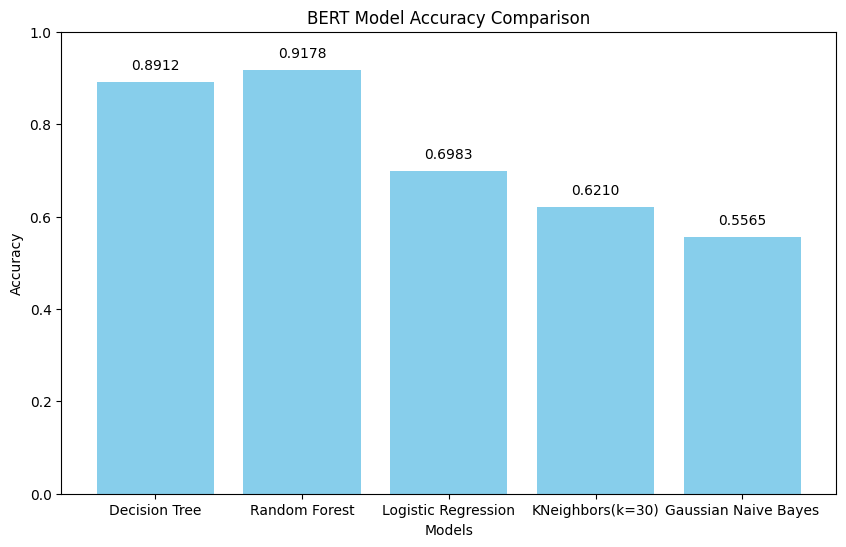

In [114]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

results_bert = {}
for result in results:
    model_name = result['model_name']
    results_bert[model_name] = {'accuracy': result['test_accuracy']}
model_identifiers = list(results_bert.keys())
model_accuracies = [results_bert[name]["accuracy"] for name in model_identifiers]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_identifiers, model_accuracies, color="skyblue")

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("BERT Model Accuracy Comparison")
plt.ylim(0, 1)

# Add accuracy values on top of the bars
for i, acc in enumerate(model_accuracies):
    plt.text(i, acc + 0.02, f"{acc:.4f}", ha="center", va="bottom")

# Show the plot
plt.show()

